In [3]:
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import subprocess

In [11]:
#Rasterio import

import rasterio

#Open DSM and DTM with rasterio and print metadata

DSM = rasterio.open("DHMVIIDSMRAS1m_k01.tif", driver="GTiff")
DTM = rasterio.open("DHMVIIDTMRAS1m_k01.tif", driver="GTiff")
print(DSM.meta)
print(DTM.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [2]:
#Reading the raster layer DSM

print(type(DSM))

print(type(DSM.read(1)))
print(DSM.read(1))

<class 'rasterio.io.DatasetReader'>
<class 'numpy.ndarray'>
[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.695e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.687e+01  1.688e+01  1.691e+01]]


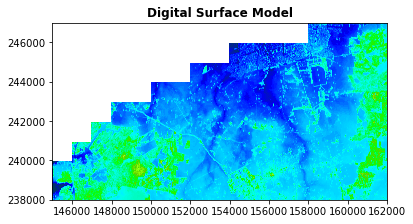

<AxesSubplot:title={'center':'Digital Surface Model'}>

In [16]:
#show image DSM

rasterio.plot.show(DSM, title='Digital Surface Model', cmap='gist_ncar')

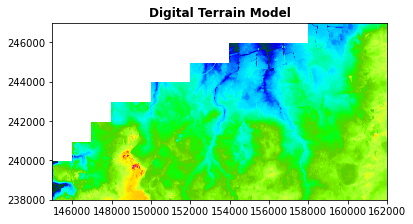

<AxesSubplot:title={'center':'Digital Terrain Model'}>

In [13]:
#show image DTM

rasterio.plot.show(DTM, title='Digital Terrain Model', cmap='gist_ncar')

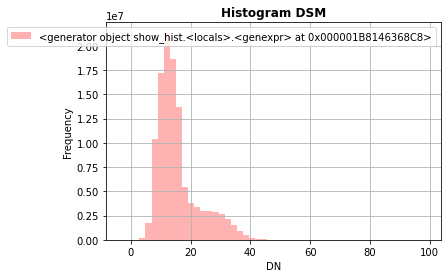

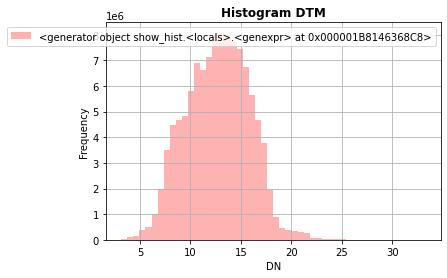

In [20]:
#DSM and DTM histograms

rasterio.plot.show_hist(DSM, bins=50, lw=0.0,
                        stacked=False, alpha=0.3,
                        histtype='stepfilled', title="Histogram DSM")

rasterio.plot.show_hist(DTM, bins=50, lw=0.0,
                        stacked=False, alpha=0.3,
                        histtype='stepfilled', title="Histogram DTM")

In [28]:
#Creating CHM

CHM = DSM.read() - DTM.read()
print(type(CHM))

<class 'numpy.ndarray'>


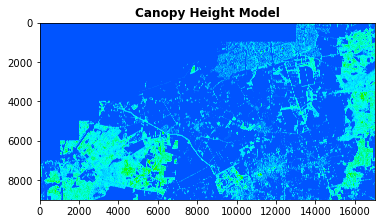

<AxesSubplot:title={'center':'Canopy Height Model'}>

In [15]:
#Showing CHM

show(CHM, title='Canopy Height Model', cmap='gist_ncar')

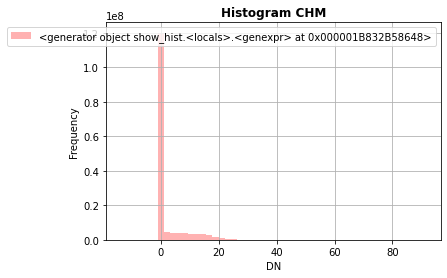

In [30]:
rasterio.plot.show_hist(CHM, bins=50, lw=0.0,
                        stacked=False, alpha=0.3,
                        histtype='stepfilled', title="Histogram CHM")

In [23]:
#getting info from database.zip using
import geopandas

zipfile = "zip://C:/Users/VervoortLaptop/Documents/Python Project/3D-Housing-Project/3D-House-Project/CadGIS_fiscaal_20200101_GewVLA_Shapefile.zip!Shapefile"
gdf = geopandas.read_file(zipfile)
display(gdf)

#I don't really understand this file

,OIDN,UIDN,RECID,TYPE,LBLTYPE,FISCSITID,FISCSIT,UPDDATE,LENGTE,geometry
0,358,358,55745,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,76.41,"LINESTRING (248163.820 208001.213, 248203.100 ..."
1,359,359,55746,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,76.10,"LINESTRING (248200.797 208067.867, 248161.201 ..."
2,360,360,55747,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,63.92,"LINESTRING (247224.751 207992.658, 247230.648 ..."
3,361,361,55748,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,49.90,"LINESTRING (248261.832 207869.288, 248289.933 ..."
4,362,362,55749,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,129.95,"LINESTRING (247103.262 207553.707, 247100.140 ..."
...,...,...,...,...,...,...,...,...,...,...
71668,158162,158227,1007573,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,8.31,"LINESTRING (179110.139 181212.224, 179102.630 ..."
71669,158163,158228,1007574,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,37.70,"LINESTRING (179140.482 181234.597, 179110.139 ..."
71670,158164,158229,1007575,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,6.38,"LINESTRING (179145.463 181238.578, 179140.482 ..."
71671,158165,158230,1007633,UN,Niet gedefinieerd,5,2020-01-01,2020-02-20,43.03,"LINESTRING (173387.189 175222.281, 173393.956 ..."


In [33]:
import pandas as pd

zipfile = "openaddress-bevlg.csv"
adresses = pd.read_csv(zipfile)

adresses.head(5)

C:\Users\VervoortLaptop\anaconda3\envs\3D-Housing-Project\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EPSG:31370_x,EPSG:31370_y,EPSG:4326_lat,EPSG:4326_lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,municipality_name_nl,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,Turnhout,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,Mechelen,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,Wachtebeke,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,Gavere,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,Gent,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current


In [34]:
adresses.isna().sum()
adresses.head(5)

,EPSG:31370_x,EPSG:31370_y,EPSG:4326_lat,EPSG:4326_lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,municipality_name_nl,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,Turnhout,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,Mechelen,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,Wachtebeke,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,Gavere,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,Gent,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current


In [35]:
adresses.postcode = adresses.postcode.astype("str")
adresses["full_adress"] = adresses.streetname_nl + " " + adresses.house_number + " " + adresses.postcode + " " + adresses.postname_nl 

adresses.head(5)

,EPSG:31370_x,EPSG:31370_y,EPSG:4326_lat,EPSG:4326_lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,...,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status,full_adress
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,...,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current,Steenweg op Oosthoven 51 2300 Turnhout
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,...,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current,Duivenstraat 102 2800 Mechelen/Walem
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,...,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current,Meersstraat 7 9185 Wachtebeke
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,...,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current,Nijverheidsstraat 67 9890 Asper/Baaigem/Dikkel...
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,...,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current,Klaverstraat 1A 9000 Gent


In [50]:
#Adress in Zone 1 (folder k01) of the TIF files (DMS and DTS)

adress = "Beliestraat 137 2910 Essen"

for i in range(adresses.shape[0]):

    if adresses['full_adress'][i] == adress :
        index = i
        break
    continue


In [51]:
adresses.iloc[index]

EPSG:31370_x                             156488.89
EPSG:31370_y                             239212.62
EPSG:4326_lat                            51.462497
EPSG:4326_lon                             4.462123
address_id                                 2108098
box_number                                     NaN
house_number                                   137
municipality_id                              11016
municipality_name_de                           NaN
municipality_name_fr                           NaN
municipality_name_nl                         Essen
postcode                                      2910
postname_fr                                    NaN
postname_nl                                  Essen
street_id                                     4644
streetname_de                                  NaN
streetname_fr                                  NaN
streetname_nl                          Beliestraat
region_code                                 BE-VLG
status                         

In [ ]:
x_coordinate = adresses.iloc[index].EPSG:31370_x
y_coordinate = adresses.iloc[index].EPSG:31370_y

In [26]:
#Reading the raster layer CHM

import rioxarray

DSM_array = rioxarray.open_rasterio('DHMVIIDSMRAS1m_k01.tif', masked=True)
DTM_array = rioxarray.open_rasterio('DHMVIIDTMRAS1m_k01.tif', masked=True)

CHM_array = DSM_array - DTM_array #CHM = DSM - DTM
CHM_array.compute()

MemoryError: Unable to allocate 1.14 GiB for an array with shape (1, 9000, 17000) and data type float64

In [1]:
#Reading the raster layer CHM

print(type(CHM))
print(type(CHM.read(1)))

print(CHM.read(1))

NameError: name 'CHM' is not defined

In [2]:
#Handy stuff for later maybe


#importing rioxarray

import rioxarray

#loading DMS and DTS

surface_HARV = rioxarray.open_rasterio('DHMVIIDSMRAS1m_k01.tif', masked=True)
terrain_HARV_UTM18 = rioxarray.open_rasterio('DHMVIIDTMRAS1m_k01.tif', masked=True)
#putting the rasters in the same CRS

terrain_HARV_matched = terrain_HARV_UTM18.rio.reproject_match(surface_HARV)

#calculating a Canopy Height Model using rioxarray

canopy_HARV = surface_HARV - terrain_HARV_matched #CHM = DSM - DTM
canopy_HARV.compute()

#plotting the Canopy Height Model

canopy_HARV.plot(cmap="viridis")
plt.title("Canopy Height Model for Harvard Forest, Z Units: Meters")
plt.ticklabel_format(style="plain") # use this if the title overlaps the scientific notation of the y axis

#plotting the Canopy Height Model as a histogram

plt.figure()
canopy_HARV.plot.hist(bins=50)
plt.title("Histogram of Canopy Height in Meters")

import geopandas as gpd
from requests import Request
# extract only buildings on and around WUR campus
url = 'https://geodata.nationaalgeoregister.nl/bag/wfs/v1_1'
layer = 'bag:pand' # see wfs.contents
bb = ','.join(map(str, bbox)) # string of bbox needed for the request url
# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json',
      srsname='urn:ogc:def:crs:EPSG::28992', bbox=bb)
# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url
# Read data from URL
BuildingsGDF = gpd.read_file(q)